![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

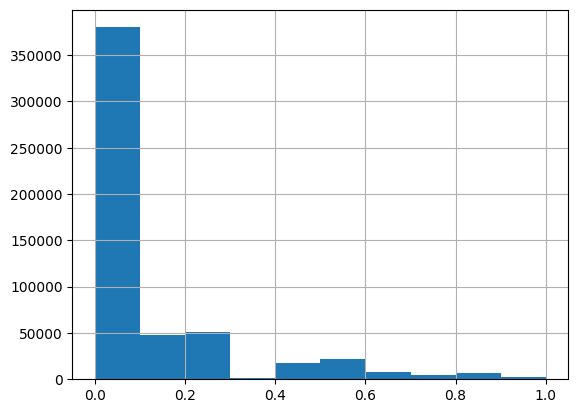

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

101388    Oral history is what ever they say it is.  Naz...
187598    Marijuana is less harmful to human health, tha...
175087    Look and see how many women are in photos of t...
521167    see like others we stood up to south africa ye...
343059                And next, they'll be coming for ISIS.
                                ...                        
110268    It's sad that BC can only choose between Liber...
259178    I'll stick to the estimates from Walter E. Wil...
365838    Isn't this exactly what Trump (and Obama befor...
131932    "no loyalty to them", I assume you mean.\nExac...
121958    You apparently have not really studied the gos...
Name: comment_text, Length: 362779, dtype: object

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Inicialmente se aplica CountVectorizer a ambos sets de datos, train y test, sin utilizar ningún parámetro y validar el comportamiento.

In [9]:
vect_A = CountVectorizer()
X_train_vectorized = vect_A.fit_transform(X_train)
X_test_vectorized = vect_A.transform(X_test)


In [10]:
X_train_vectorized.shape

(362779, 141176)

In [11]:
vect_A.vocabulary_

{'oral': 91127,
 'history': 60749,
 'is': 67439,
 'what': 136457,
 'ever': 46583,
 'they': 125107,
 'say': 110750,
 'it': 67682,
 'nazis': 86202,
 'in': 64454,
 'the': 124581,
 '1930': 1649,
 'did': 38596,
 'eugenic': 46371,
 'experiments': 47347,
 'on': 90518,
 'native': 86035,
 'children': 27384,
 'at': 14725,
 'mcgill': 80014,
 'with': 137734,
 'full': 52599,
 'knowledge': 71877,
 'of': 89814,
 'government': 55832,
 'yup': 139920,
 'if': 63495,
 'happened': 58373,
 'who': 136894,
 'are': 13363,
 'we': 135729,
 'to': 126248,
 'didn': 38619,
 'marijuana': 78894,
 'less': 74583,
 'harmful': 58542,
 'human': 62386,
 'health': 59284,
 'than': 124498,
 'cigarettes': 28085,
 'which': 136645,
 'widely': 137099,
 'used': 132446,
 'and': 11703,
 'there': 124961,
 'no': 87715,
 'ban': 16514,
 'reduces': 104654,
 'stress': 120277,
 'aggression': 9490,
 'level': 74674,
 'leading': 73899,
 'crime': 33788,
 'its': 67777,
 'medical': 80457,
 'value': 132943,
 'favorable': 48684,
 'effects': 43479,


In [12]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

Teniendo en cuenta la exploración de datos inicial y los resultados del diccionario anterior, se identificaron datos que pueden afectar el modelo como palabras con mayúsculas y minúsculas, números, entre otros.

Por lo anterior, se inició nuevamente el CV con los parámetros:
- lowercase = True para garantizar que se pongan en minúscula todas las palabras y así garantizar homogeneidad en los datos
- stopwords="english" usa un "diccionario" para eliminar el uso de palabras comunes en inglés por ejemplo is, the, and, que puedan aparecer mucho en el texto
- token_pattern=r'(?u)\b[a-zA-Z]+\b' se utiliza para eliminar los caracteres numéricos de los datos y dejar solamente palabras
- min_df = 2 aquí indicamos que el número de caracteres mínimos para tener en cuenta un feature es de 2, así filtramos aun más las palabras escogidas

In [13]:
vectorized_stop_words = CountVectorizer(stop_words="english",lowercase=True,token_pattern=r'(?u)\b[a-zA-Z]+\b',min_df = 2)

In [14]:
X_train_vectorized_stop_words = vectorized_stop_words.fit_transform(X_train)
X_test_vectorized_stop_words = vectorized_stop_words.transform(X_test)

In [15]:
X_train_vectorized_stop_words.shape

(362779, 69081)

In [16]:
vectorized_stop_words.vocabulary_

{'oral': 43196,
 'history': 28021,
 'say': 53761,
 'nazis': 40834,
 'did': 16355,
 'eugenic': 20488,
 'experiments': 21046,
 'native': 40742,
 'children': 10144,
 'mcgill': 37713,
 'knowledge': 33659,
 'government': 25508,
 'yup': 68829,
 'happened': 26837,
 'didn': 16366,
 't': 60270,
 'marijuana': 37120,
 'harmful': 26942,
 'human': 28882,
 'health': 27296,
 'cigarettes': 10493,
 'widely': 67550,
 'used': 65244,
 'ban': 4480,
 'reduces': 50473,
 'stress': 58942,
 'aggression': 1127,
 'level': 35011,
 'leading': 34600,
 'crime': 13769,
 'medical': 37918,
 'value': 65475,
 'favorable': 21764,
 'effects': 18952,
 'scientifically': 54077,
 'proven': 48517,
 'author': 3853,
 'consideration': 12470,
 'use': 65241,
 'legalized': 34779,
 'market': 37164,
 'transparent': 62639,
 'surely': 59780,
 'better': 5595,
 'illegal': 29509,
 'sales': 53376,
 'drug': 18188,
 'cases': 9066,
 'young': 68763,
 'adult': 813,
 'drugs': 18196,
 'need': 40944,
 'cause': 9288,
 'problems': 48035,
 'bigger': 572

Se decide utilizar un modelo de regresión lineal utilizando LinearRegression()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [18]:
model = LinearRegression()
model.fit(X_train_vectorized_stop_words, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test_vectorized_stop_words)
mse_CountV = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_CountV:.4f}")


Mean Squared Error: 0.0290


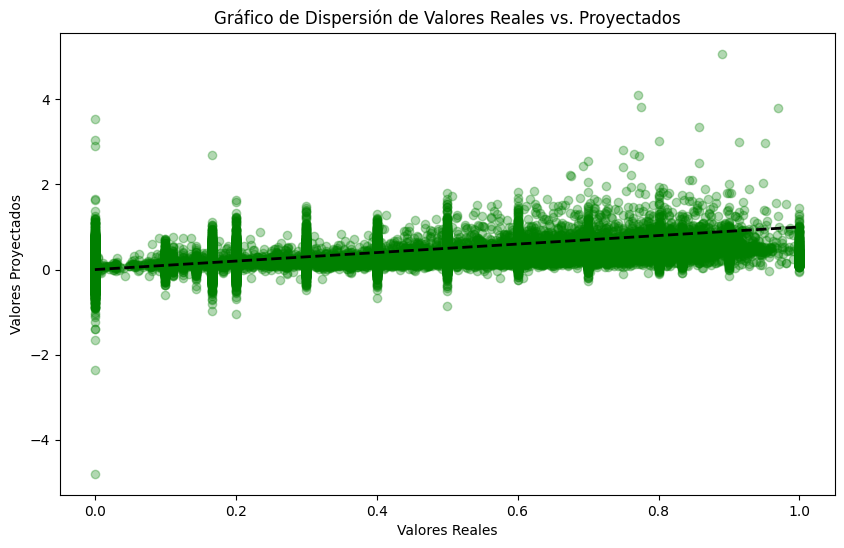

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


plt.xlabel('Valores Reales')
plt.ylabel('Valores Proyectados')
plt.title('Gráfico de Dispersión de Valores Reales vs. Proyectados')


plt.show()


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

En este apartado se utiliza el CV con los mismos parámetros anteriores y se añade ngram_range = (3,3) para indicar creación de trigramas.

In [21]:
# Celda 2
vectorized_stop_words_ngram = CountVectorizer(stop_words="english",lowercase=True,token_pattern=r'(?u)\b[a-zA-Z]+\b' ,ngram_range=(3, 3),min_df = 2)
X_train_vectorized_stop_words_ngram = vectorized_stop_words_ngram.fit_transform(X_train)
X_test_vectorized_stop_words_ngram = vectorized_stop_words_ngram.transform(X_test)


In [22]:
X_train_vectorized_stop_words_ngram.shape

(362779, 299366)

In [23]:
vectorized_stop_words_ngram.vocabulary_

{'experiments native children': 74545,
 'native children mcgill': 158938,
 'say didn t': 223921,
 'harmful human health': 98266,
 'south africa years': 235120,
 'africa years ago': 3716,
 'years ago did': 297092,
 'old time alaskans': 168591,
 'vast amounts oil': 278531,
 'amounts oil wealth': 8061,
 'poor don t': 184743,
 'don t pay': 64165,
 't pay taxes': 251255,
 'piece doesn t': 181291,
 'm just gonna': 142879,
 'just gonna say': 120156,
 'gun ability rapidly': 96125,
 'ability rapidly shoot': 117,
 'rapidly shoot multiple': 196864,
 'shoot multiple rounds': 229864,
 'instead republican party': 113463,
 'dominated far right': 62901,
 'chose donald trump': 33688,
 'donald trump s': 65156,
 'trump s sort': 271391,
 's sort thing': 219819,
 'sort thing happens': 234513,
 'power gop did': 186454,
 'far right rinos': 77789,
 'going trump s': 90340,
 'm guessing say': 142789,
 'reason rational thought': 199952,
 'attempting defend indefensible': 12764,
 'guess justin just': 95859,
 'whi

In [24]:
model = LinearRegression()
model.fit(X_train_vectorized_stop_words_ngram, y_train)

LinearRegression()

In [25]:
y_predngram = model.predict(X_test_vectorized_stop_words_ngram)
mse_ngram = mean_squared_error(y_test, y_predngram)
print(f"Mean Squared Error: {mse_ngram:.4f}")


Mean Squared Error: 0.1188


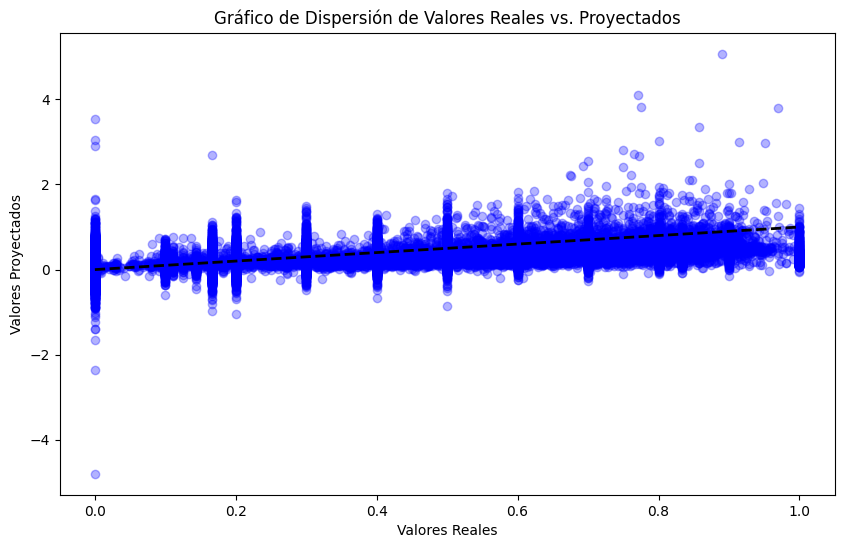

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


plt.xlabel('Valores Reales')
plt.ylabel('Valores Proyectados')
plt.title('Gráfico de Dispersión de Valores Reales vs. Proyectados')


plt.show()

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [27]:
# Celda 3



**TfidfVectorizer** es una técnica de vectorización que asigna un peso alto a los términos que aparecen frecuentemente en un documento específico pero son inusuales en el corpus general. Esto significa que si una palabra se repite varias veces en un solo documento, pero no es común en otros documentos del conjunto, entonces probablemente esa palabra sea muy significativa o descriptiva para el contenido de su documento.

Esta técnica se fundamenta en dos conceptos estadísticos: **la Frecuencia de Término** (TF) y **la Frecuencia Inversa de Documento** (IDF).

**TF (Term Frequency):** Se refiere a la frecuencia en la que aparece una palabra en un documento.

**IDF (Inverse Document Frequency):** Esto mide la importancia de la palabra en el corpus. Cuanto más común es la palabra a través de documentos, menos importante se considera.

**Cálculo de TF-IDF:** El valor de TF-IDF es simplemente el producto de TF e IDF. Esto significa que las palabras que son comunes en un documento pero raras en otros documentos reciben un alto puntaje de TF-IDF.

**Funcionamiento:**

Aunque TF-IDF no elimina físicamente términos del conjunto de datos o de la matriz, términos con un IDF muy bajo (es decir, términos que son muy comunes en todo el corpus) recibirán pesos muy bajos en la matriz TF-IDF.

Documento 1: "Uniandes es una universidad"

Documento 2: "En Bogota esta Uniandes"

La palabra "Uniandes" aparece en ambos documentos y tendría una baja puntuación de IDF. Sin embargo, "es", "una" y "Universidad" aparecen solo en el Documento 1, y "En", "Bogota" y "esta" solo en el Documento 2, por lo tanto, tendrían una alta puntuación de IDF y un alto valor TF-IDF en sus respectivos documentos si esos términos son poco comunes en el corpus completo.

Estas ponderaciones ayudan a diferenciar palabras que son comunes en un documento pero raras en otros.

**Ventaja sobre CountVectorizer**

AYuda a determinar cuales palabras son mas importantes en un documento y a lo largo del corpus.

Aunque la matriz generada por TfidfVectorizer puede tener un tamaño similar a la de CountVectorizer sin filtros, los términos que contiene están mejor preparados para ser utilizados directamente en modelos de aprendizaje automático debido a la normalización y ponderación incorporada.

**Desventaja en comparación con CountVectorizer**

Puede llevar a sesgos o sobreajustes si el corpus no es representativo ya que puede no reflejar correctamente la importancia de los terminos.

Adicionalmente, la interpretación de los valores TF-IDF puede ser menos intuitiva que la simple frecuencia de términos, complicando el análisis de los factores que influyen en el comportamiento del modelo.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer


In [29]:
vectorizertfid = TfidfVectorizer(lowercase=True,token_pattern=r'(?u)\b[a-zA-Z]+\b' )

In [30]:
X_train_vectorizertfid = vectorizertfid.fit_transform(X_train)
X_test_vectorizertfid = vectorizertfid.transform(X_test)


In [31]:
X_train_vectorizertfid.shape

(362779, 126748)

In [32]:
model = LinearRegression()
model.fit(X_train_vectorizertfid, y_train)

LinearRegression()

In [33]:
y_predtfid = model.predict(X_test_vectorizertfid)
mse_tfid = mean_squared_error(y_test, y_predtfid)
print(f"Mean Squared Error: {mse_tfid:.4f}")

Mean Squared Error: 0.0272


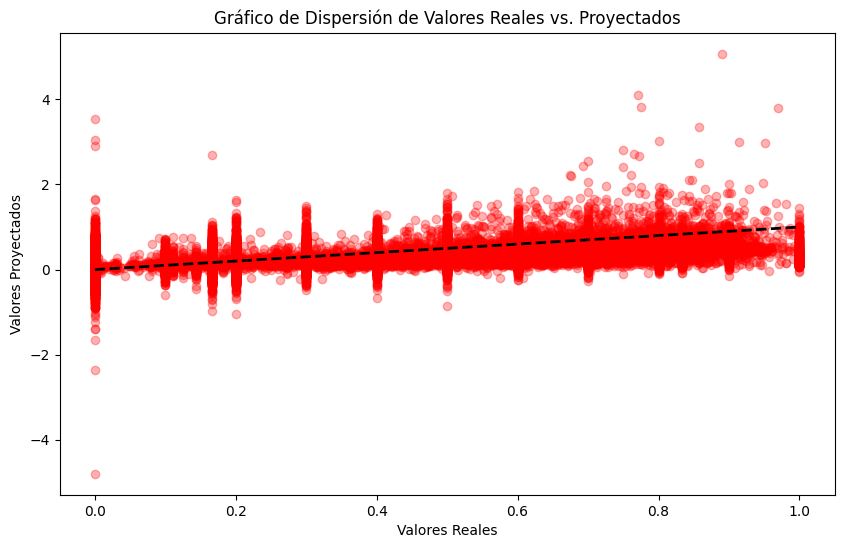

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


plt.xlabel('Valores Reales')
plt.ylabel('Valores Proyectados')
plt.title('Gráfico de Dispersión de Valores Reales vs. Proyectados')


plt.show()

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

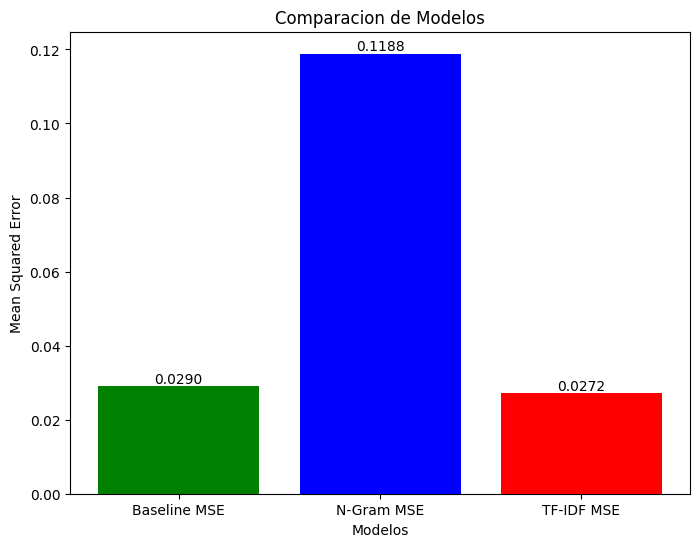

In [35]:
# Celda 5

model_names = ['Baseline MSE', 'N-Gram MSE', 'TF-IDF MSE']

mse_values = [mse_CountV, mse_ngram, mse_tfid]

plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_values, color=['green', 'blue', 'red'])

plt.title('Comparacion de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Mean Squared Error')

for i in range(len(mse_values)):
    plt.text(i, mse_values[i], f'{mse_values[i]:.4f}', ha = 'center', va = 'bottom')

plt.show()

In [36]:
#EXTRA

vectorizertfid_ngram = TfidfVectorizer(lowercase=True,token_pattern=r'(?u)\b[a-zA-Z]+\b'  ,ngram_range=(3, 3))

In [37]:
X_train_vectorizertfid_ngram = vectorizertfid.fit_transform(X_train)
X_test_vectorizertfid_ngram = vectorizertfid.transform(X_test)


In [38]:
model = LinearRegression()
model.fit(X_train_vectorizertfid_ngram, y_train)

LinearRegression()

In [39]:
y_pred_tfid_2 = model.predict(X_test_vectorizertfid)
mse_tfid_ngram = mean_squared_error(y_test, y_pred_tfid_2)
print(f"Mean Squared Error: {mse_tfid_ngram:.4f}")

Mean Squared Error: 0.0272


Durante la ejecucion de este proyectos, enfrentamos diversos desafíos asociados con la alta dimensionalidad generada por los tokens. Mediante una investigación detallada, implementamos estrategias efectivas de reducción dimensional, tales como la eliminación de stop words en inglés, la conversión de texto a minúsculas y la adopción de un patrón de tokenización que excluyó números al no ser relevantes para la identificación de comentarios tóxicos.

En el primer enfoque de countVectorizer agregamos una configuracion adicional con min_df  = 2 para asegurarnos que el token estuviera presente en al menos dos documentos, ya que aquellos con 1 sola aparicion tal vez no estaba en el archivo de test. La matriz resultante tiene 69,081 características, y el modelo de regresión lineal asociado tiene un Mean Squared Error (MSE) de 0.0290.

Nuestro siguiente enfoque fue realizar countvectorizer pero con trigramas y la misma configuración de min_df, para asegurar que el trigrama apareciera minimo en dos documentos. La matriz se expande significativamente a 299,366 tokens, pero el MSE aumenta a 0.1188.

Posteriormente, realizamos la tecnica de TfidfVectorizer, la cual produjo una matriz de 126,748 características, con un MSE de 0.0272, el más bajo de los tres modelos. Este modelo no solo cuenta la frecuencia de las palabras, sino también su importancia relativa en todo el corpus. El bajo MSE indica que esta técnica de ponderación es efectiva.

Debido a que el uso de trigramas captura más contexto lingüístico en comparación con los unigramas,decidimos implementar TfidfVectorizer con trigramas y configuraciones similares, lo cual mantuvo el MSE en 0.0272. Esta es una mejora en la predicción, aun conservando un contexto.

Este análisis muestra la importancia de un preprocesamiento de texto adecuado. Mientras que los trigramas ofrecen más contexto, no siempre resultan en mejor rendimiento predictivo, especialmente sin técnicas adicionales para manejar la alta dimensionalidad y la relevancia de las características. En contraste, TfidfVectorizer proporciona un método eficiente para equilibrar la frecuencia y la relevancia de las características, lo que resulta en un mejor rendimiento general. Como next steps para futuros análisis se deberían explorar otros modelos que pudieran obtener un desempeño aun mejor.